<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MLP for MNIST
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score

train: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


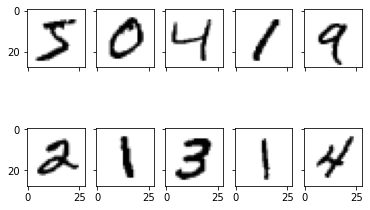

[7]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()  #60000 samples for training, 10000 samples for testing

print('train:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

# visualize some
fig, ax = plt.subplots(2,5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_train[i,:], cmap='binary')
plt.show()

# prepare the data for training
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train)
print(y_test[0:1])
y_test = to_categorical(y_test)

print(y_test[0:1,:])

In [ ]:
# classification model
input_shape=x_train.shape[1]
num_classes = y_train.shape[1]
model = Sequential()
model.add(Dense(350, activation='relu', input_shape=(28*28,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs=100, batch_size=512, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=1)

print(f'Test results \n - Loss    : {test_results[0]: 0.3f}  \n - Accuracy: {test_results[1]: 0.3f}')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 50)                17550     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 292,810
Trainable params: 292,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 6s 11ms/step - loss: 0.5165 - accuracy: 0.8550 - val_loss: 0.2264 - val_accuracy: 0.9360
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.1918 - accuracy: 0.9451 - val_loss: 0.1556 - val_accuracy: 0.9567
Epoch 3/100
94/94 [============

313/313 [==============================] - 1s 2ms/step
Precision score: 0.9817451718787883
Recall score   : 0.9816496584126522
Confusion Matrix
[[ 971    1    1    1    1    1    1    1    1    1]
 [   0 1125    4    1    0    1    2    0    2    0]
 [   5    2 1007    3    3    0    2    5    5    0]
 [   1    0    3  991    0    3    1    2    5    4]
 [   1    0    3    0  966    0    2    2    2    6]
 [   1    0    0    8    1  871    6    0    2    3]
 [   5    3    1    1    3    4  941    0    0    0]
 [   1    4    6    1    1    0    0 1009    1    5]
 [   3    0    3    3    4    3    2    3  951    2]
 [   2    2    0    5    7    1    1    5    0  986]]
1875/1875 [==============================] - 6s 3ms/step


<Figure size 432x288 with 0 Axes>

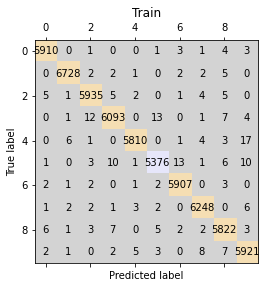

313/313 [==============================] - 1s 2ms/step


<Figure size 432x288 with 0 Axes>

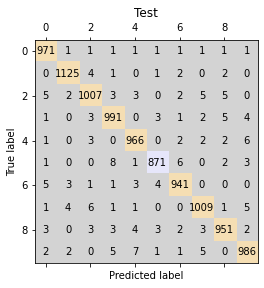

In [ ]:
y_pred = model.predict(x_test)

predicted_labels = np.argmax(y_pred, axis=-1)
actual_labels = np.argmax(y_test, axis=-1)

print('Precision score:', precision_score(actual_labels, predicted_labels, average='macro'))
print('Recall score   :', recall_score(actual_labels, predicted_labels, average='macro'))


print('Confusion Matrix')
print(confusion_matrix(y_test.argmax(1), y_pred.argmax(1)))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

#confusion matrix
def cm(y_test, y_pred, title):
  cm = confusion_matrix(y_test, y_pred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

cm(y_train.argmax(1), model.predict(x_train).argmax(1), title='Train')
cm(y_test.argmax(1), model.predict(x_test).argmax(1), title='Test')